In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
RANDOM_STATE = 42

In [ ]:
data = pd.read_csv("breast_cancer_survival.csv")
data.head()

In [ ]:
from sklearn.model_selection import train_test_split
column_name_mapping={'ER status':'ERstatus','PR status':'PRstatus','HER2 status':'HER2status'}
data.rename(columns=column_name_mapping,inplace=True)

data.Patient_Status[data.Patient_Status == 'Dead'] = 0

data.Patient_Status[data.Patient_Status == 'Alive'] = 1

data.HER2status[data.HER2status == 'Positive'] = 1

data.HER2status[data.HER2status == 'Negative'] = 0

data.Tumour_Stage[data.Tumour_Stage == 'II'] = 2

data.Tumour_Stage[data.Tumour_Stage == 'I'] = 1

data.Tumour_Stage[data.Tumour_Stage == 'III'] = 3

data.Surgery_type[data.Surgery_type == 'Other'] = 1

data.Surgery_type [data.Surgery_type == 'Lumpectomy'] = 2
data.Surgery_type[data.Surgery_type == 'Modified Radical Mastectomy'] = 3

data.Surgery_type[data.Surgery_type == 'Simple Mastectomy'] = 4

data = data.dropna()
print(data)

In [ ]:
from sklearn.model_selection import train_test_split
x= data.drop(columns = ['Date_of_Surgery', 'Date_of_Last_Visit', 'Histology', "Gender", 'ERstatus', 'PRstatus'])
y = data['Patient_Status']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=RANDOM_STATE)
print(y_train.value_counts())
print(y_test.value_counts())


In [24]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [ ]:
from sklearn.svm import SVC

#for displaying evaluation metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
svc = SVC()
svc.fit(x_train, y_train)
y_pred_svc =svc.predict(x_test)
y_pred_svc.shape


In [37]:
#print confusion matrix
cm = confusion_matrix(y_test, y_pred_svc)
print("Confusion matrix:\n",cm)

Confusion matrix:
 [[ 0 17]
 [ 0 63]]


In [36]:
creport = classification_report(y_test, y_pred_svc)
print("Classification report:\n",creport)

Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.79      1.00      0.88        63

    accuracy                           0.79        80
   macro avg       0.39      0.50      0.44        80
weighted avg       0.62      0.79      0.69        80



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_svc)
precision = precision_score(y_test, y_pred_svc)
recall = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7875
Precision: 0.7875
Recall: 1.0
F1-Score: 0.881118881118881


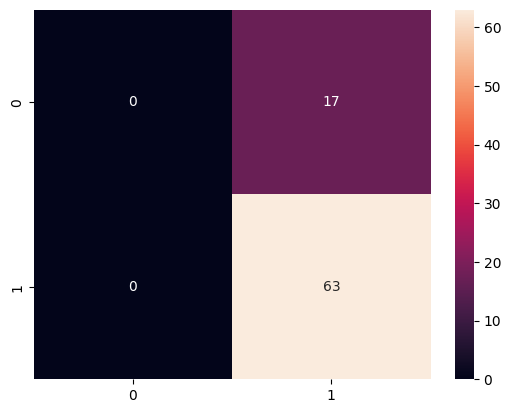

In [35]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm, annot=True)
plt.show()